In [1]:
from board import Board
from game_logic import LabyrinthEnv
import os
import platform

In [2]:
def clear_console():
    if platform.system() == "Windows":
        os.system('cls')
    else:
        os.system('clear')


--- Start of Turn for Player 1 ---
Player 1 Location: (0, 0)
Player 1 Current Card: G


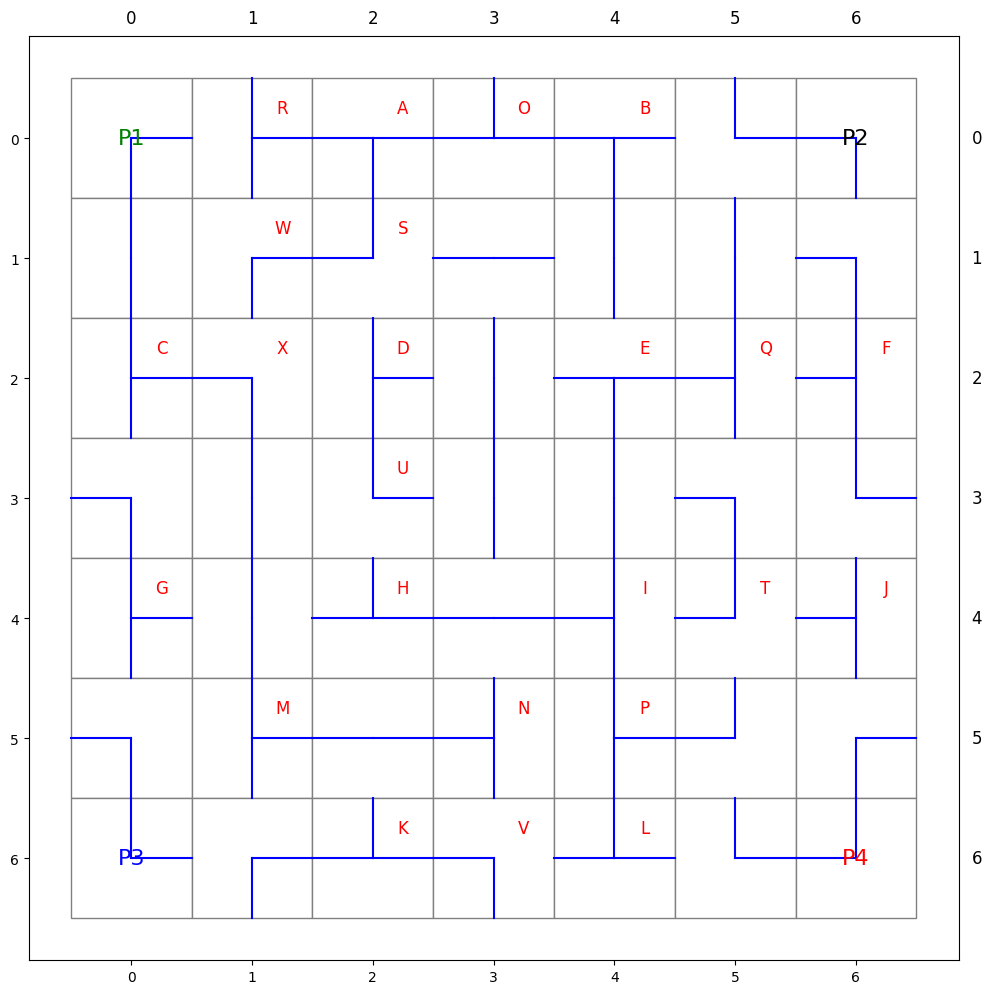

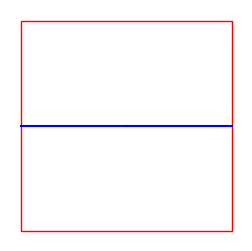

In [3]:
def main():
    # Create a board
    board = Board(size=7)
    
    # Initialize the game environment
    env = LabyrinthEnv(board)
    
    # Set up turn order
    current_player_index = 0

    while True:
        # Clear the console at the start of each turn
        clear_console()

        # Determine the current player
        player = env.players[current_player_index]

        # Start of Turn
        print(f"\n--- Start of Turn for Player {player.id} ---")
        print(f"Player {player.id} Location: {player.position}")
        print(f"Player {player.id} Current Card: {player.current_card}")

        # 1. Show the board
        env.board.visualize_board(env.players)
        
        # 2. Show the excess tile
        env.board.visualize_excess_tile()
        
        # 3. Prompt player (AI or Agent) for piece orientation
        while True:
            try:
                rotation_input = input(f"Player {player.id}, enter rotation for the spare tile (0, 90, 180, 270): ").strip()
                if rotation_input == "":
                    raise ValueError("Rotation input cannot be empty.")
                rotation = int(rotation_input)
                if rotation not in [0, 90, 180, 270]:
                    raise ValueError("Invalid rotation. Please enter 0, 90, 180, or 270.")
                env.board.rotate_excess_tile(rotation)
                break
            except ValueError as e:
                print(e)
        
        # 4. Show the excess tile with the new orientation
        print(f"Tile rotation: {rotation}")
        env.board.visualize_excess_tile()
        
        # 5. Ask if orientation is correct
        correct_orientation = input(f"Player {player.id}, is this orientation correct? (y/n): ").strip().lower()
        if correct_orientation != "y":
            continue  # Go back to step 3 if orientation is not correct
        
        # 7. Prompt for push direction (left, right, up, down)
        while True:
            direction = input(f"Player {player.id}, enter push direction (left, right, up, down): ").strip().lower()
            if direction in ['left', 'right', 'up', 'down']:
                break
            else:
                print("Invalid direction. Please enter 'left', 'right', 'up', or 'down'.")
        
        # 8. Prompt for push location
        while True:
            try:
                position = int(input(f"Player {player.id}, enter push location (1, 3, or 5): "))
                if position in [1, 3, 5]:
                    break
                else:
                    print("Invalid position. Please enter 1, 3, or 5.")
            except ValueError:
                print("Invalid input. Please enter a number (1, 3, or 5).")
        
        # 9. Execute the push, show board and new excess tile
        while True:
            try:
                env.step(player.id, {'type': 'push', 'direction': direction, 'position': position})
                print("Push successful")
                break  # Exit the loop if the push is successful
            except ValueError as e:
                print(e)
                # Go back to step 7 (selecting direction and position)
                direction = input(f"Player {player.id}, re-enter push direction (left, right, up, down): ").strip().lower()
                if direction not in ['left', 'right', 'up', 'down']:
                    continue  # Invalid direction, re-prompt
                try:
                    position = int(input(f"Player {player.id}, re-enter push location (1, 3, or 5): "))
                    if position not in [1, 3, 5]:
                        continue  # Invalid position, re-prompt
                except ValueError:
                    continue  # Invalid input, re-prompt
        
        # Visualize the board and new excess tile after the push
        clear_console()
        env.board.visualize_board(env.players)
        env.board.visualize_excess_tile()
        
        # 10. Prompt player for piece movement location
        while True:
            try:
                new_row = int(input(f"Player {player.id}, enter target row for movement: "))
                new_col = int(input(f"Player {player.id}, enter target column for movement: "))
                if 0 <= new_row < env.board.size and 0 <= new_col < env.board.size:
                    # Check if the move is valid
                    if env.is_valid_move(player.position, (new_row, new_col)):
                        env.step(player.id, {'type': 'move', 'player_id': player.id, 'new_position': (new_row, new_col)})
                        break  # Exit loop if the move is successful
                    else:
                        print(f"({new_row}, {new_col}) is invalid move. Please choose a valid path on the board.")
                else:
                    print("Invalid position. Please enter coordinates within the board range (0-6).")
            except ValueError:
                print("Invalid input. Please enter valid row and column numbers.")

        # Visualize the board after the move
        clear_console()
        env.board.visualize_board(env.players)
        
        print(f"\n--- End of Turn for Player {player.id} ---")

        # Switch to the next player
        current_player_index = (current_player_index + 1) % len(env.players)

if __name__ == "__main__":
    main()